Importing CIFAR10 dataset from kaggle

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c cifar-10

100% 715M/715M [00:27<00:00, 31.1MB/s]
100% 715M/715M [00:27<00:00, 26.9MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [ ]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 48.7 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall() # archive.extractall(path='path to folder in which you want to extract')
archive.close()

archive = py7zr.SevenZipFile('/content/test.7z', mode='r')
archive.extractall() # archive.extractall(path='path to folder in which you want to extract')
archive.close()

In [ ]:
import os

filenames = os.listdir('/content/train')

In [ ]:
print(filenames[:5])

['5286.png', '37206.png', '26066.png', '21336.png', '33174.png']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [ ]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [ ]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [ ]:
labels_dict={
    'airplane':0,
    'frog':1,
    'truck':2,
    'deer':3,
    'automobile':4,
    'bird':5,
    'horse':6,
    'ship':7,
    'cat':8,
    'dog':9,
}

In [ ]:
labels = [labels_dict[i] for i in labels_df['label']]

In [ ]:
print(labels)

[1, 2, 2, 3, 4, 4, 5, 6, 7, 8, 3, 6, 6, 5, 2, 2, 2, 8, 5, 1, 3, 8, 1, 1, 5, 1, 8, 9, 3, 0, 0, 2, 4, 8, 3, 0, 8, 6, 8, 8, 9, 5, 5, 6, 4, 4, 4, 5, 5, 0, 2, 9, 6, 2, 5, 5, 9, 5, 3, 8, 4, 4, 7, 5, 4, 4, 3, 2, 6, 7, 9, 2, 1, 6, 8, 4, 2, 0, 8, 4, 8, 9, 3, 9, 6, 6, 3, 6, 2, 3, 5, 8, 7, 0, 4, 1, 4, 4, 3, 4, 7, 8, 2, 1, 1, 4, 7, 9, 5, 2, 2, 7, 4, 6, 6, 0, 0, 1, 2, 4, 5, 5, 2, 5, 1, 1, 4, 2, 9, 0, 3, 6, 1, 6, 4, 7, 4, 4, 5, 7, 4, 8, 8, 1, 5, 3, 2, 2, 9, 3, 8, 1, 6, 3, 1, 7, 9, 9, 3, 8, 4, 7, 3, 6, 1, 0, 2, 9, 4, 8, 7, 5, 6, 9, 8, 3, 4, 9, 6, 0, 3, 6, 9, 9, 4, 0, 2, 1, 2, 0, 7, 6, 7, 7, 5, 9, 5, 8, 9, 0, 1, 4, 2, 8, 1, 2, 4, 8, 2, 1, 1, 6, 4, 0, 2, 9, 7, 9, 5, 2, 0, 7, 7, 0, 1, 2, 4, 4, 1, 8, 6, 1, 1, 0, 1, 1, 4, 6, 4, 9, 7, 8, 1, 1, 7, 1, 7, 3, 1, 1, 4, 8, 7, 8, 3, 4, 6, 4, 8, 7, 9, 4, 4, 3, 0, 2, 8, 6, 3, 2, 2, 5, 3, 2, 2, 4, 0, 9, 2, 0, 7, 5, 4, 5, 0, 9, 1, 8, 5, 6, 7, 7, 1, 0, 6, 2, 3, 9, 1, 3, 5, 4, 4, 5, 4, 9, 2, 2, 0, 7, 3, 4, 4, 1, 8, 8, 2, 0, 6, 2, 6, 6, 2, 4, 9, 4, 1, 1, 7, 6, 4, 8, 0, 

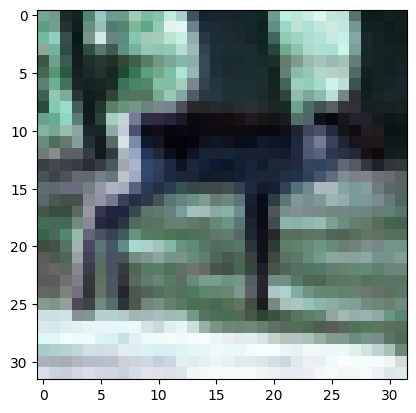

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/train/5286.png')
plt.imshow(img)
plt.show()

In [ ]:
img.shape

(32, 32, 3)

In [ ]:
ids = labels_df['id']
print(ids)

0            1
1            2
2            3
3            4
4            5
         ...  
49995    49996
49996    49997
49997    49998
49998    49999
49999    50000
Name: id, Length: 50000, dtype: int64


In [ ]:
data = []
for i in ids:
  img = cv2.imread('/content/train/'+str(i)+'.png')
  data.append(img)

In [ ]:
len(data)

50000

In [ ]:
data

[array([[[ 63,  62,  59],
         [ 45,  46,  43],
         [ 43,  48,  50],
         ...,
         [108, 132, 158],
         [102, 125, 152],
         [103, 124, 148]],
 
        [[ 20,  20,  16],
         [  0,   0,   0],
         [  0,   8,  18],
         ...,
         [ 55,  88, 123],
         [ 50,  83, 119],
         [ 57,  87, 122]],
 
        [[ 21,  24,  25],
         [  0,   7,  16],
         [  8,  27,  49],
         ...,
         [ 50,  84, 118],
         [ 50,  84, 120],
         [ 42,  73, 109]],
 
        ...,
 
        [[ 96, 170, 208],
         [ 34, 153, 201],
         [ 26, 161, 198],
         ...,
         [ 70, 133, 160],
         [  7,  31,  56],
         [ 20,  34,  53]],
 
        [[ 96, 139, 180],
         [ 42, 123, 173],
         [ 30, 144, 186],
         ...,
         [ 94, 148, 184],
         [ 34,  62,  97],
         [ 34,  53,  83]],
 
        [[116, 144, 177],
         [ 94, 129, 168],
         [ 87, 142, 179],
         ...,
         [140, 184, 216],
  

In [ ]:
data[0].shape

(32, 32, 3)

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
X_train_std = X_train/255.0
X_test_std = X_test/255.0

**Applying ResNet50 Model**

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(32,32,3),
    pooling=True,
    classes=10,
    classifier_activation='softmax'
)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train_std, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
938/938 [==============================] - 97s 65ms/step - loss: 2.1943 - accuracy: 0.3199 - val_loss: 2.7752 - val_accuracy: 0.1761
Epoch 2/10
938/938 [==============================] - 55s 58ms/step - loss: 2.2712 - accuracy: 0.3056 - val_loss: 6.4564 - val_accuracy: 0.2531
Epoch 3/10
938/938 [==============================] - 56s 59ms/step - loss: 2.1709 - accuracy: 0.3184 - val_loss: 2.9953 - val_accuracy: 0.3523
Epoch 4/10
938/938 [==============================] - 59s 63ms/step - loss: 2.1540 - accuracy: 0.3199 - val_loss: 1.7566 - val_accuracy: 0.3805
Epoch 5/10
938/938 [==============================] - 54s 57ms/step - loss: 1.8507 - accuracy: 0.3971 - val_loss: 6.4957 - val_accuracy: 0.2896
Epoch 6/10
938/938 [==============================] - 56s 59ms/step - loss: 2.0468 - accuracy: 0.3550 - val_loss: 3.8031 - val_accuracy: 0.3739
Epoch 7/10
938/938 [==============================] - 58s 62ms/step - loss: 1.8382 - accuracy: 0.4010 - val_loss: 1.9427 - val_accuracy:

As you can see simple resNet50 model is not performing well now we will use transfer learning technique in which we will take already trained weights of 'imagenet' dataset trained on resnet50 and on these weights we add some layers

In [ ]:
from tensorflow import keras

In [ ]:
resnet = keras.applications.ResNet50(
    include_top=False, #this will remove the output layer
    weights='imagenet',
    input_shape=(256,256,3),
    classes=10000,
    classifier_activation='softmax'
)


94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.UpSampling2D(size=(2,2)))
model.add(keras.layers.UpSampling2D(size=(2,2)))
model.add(keras.layers.UpSampling2D(size=(2,2)))
model.add(resnet)
model.add(keras.layers.Flatten())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
hist = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
 82/938 [=>............................] - ETA: 9:29:40 - loss: 2.5674 - accuracy: 0.1498

KeyboardInterrupt: 

In [ ]:
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], lable='validation loss')
plt.show()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], lable='validation accuracy')
plt.show()

NameError: name 'hist' is not defined